# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

# Universidad Nacional de Córdoba
---

### Importación de librerías

In [105]:
import warnings
import datetime
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBClassifier

from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.impute import SimpleImputer

from pandas.plotting import lag_plot

import pyarrow
import fastparquet

import statsmodels

### Lectura del dataset 

In [106]:
df = pd.read_parquet('df_supervisado_agrupado.parquet')
df

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_1,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,47.0,229.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,64.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64


In [108]:
df.columns

Index(['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad',
       'client__antig', 'client__x0_Hombre', 'client__x0_Mujer',
       'client__x0_Sin Datos', 'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio', 'client__x1_Sector_Financiero',
       'client__x1_Sector_No_Operativo', 'client__x1_Sector_Operativo',
       'client__x1_Sector_Salud', 'client__x1_Sector_Seguridad',
       'client__x1_Sector_Sin_Datos', 'client__x2_Casado', 'client__x2_Otros',
       'client__x2_Sin_datos', 'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC',
       'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacio

Ordenamos nuestro conjunto de datos en función a la variable anio_mes_cupon.

In [3]:
df = df.sort_values(by = ['anio_mes_cupon'], ascending = True)
df['o_mes'] = df.anio_mes_cupon.astype('category').cat.codes

df['monto_ajustado'].describe().round(2)

count      7410.00
mean      11808.44
std       14823.98
min      -14160.39
25%         987.78
50%        6373.59
75%       17248.53
max      134045.42
Name: monto_ajustado, dtype: float64

### Distribución de features numericas con respecto al target, monto_ajustado

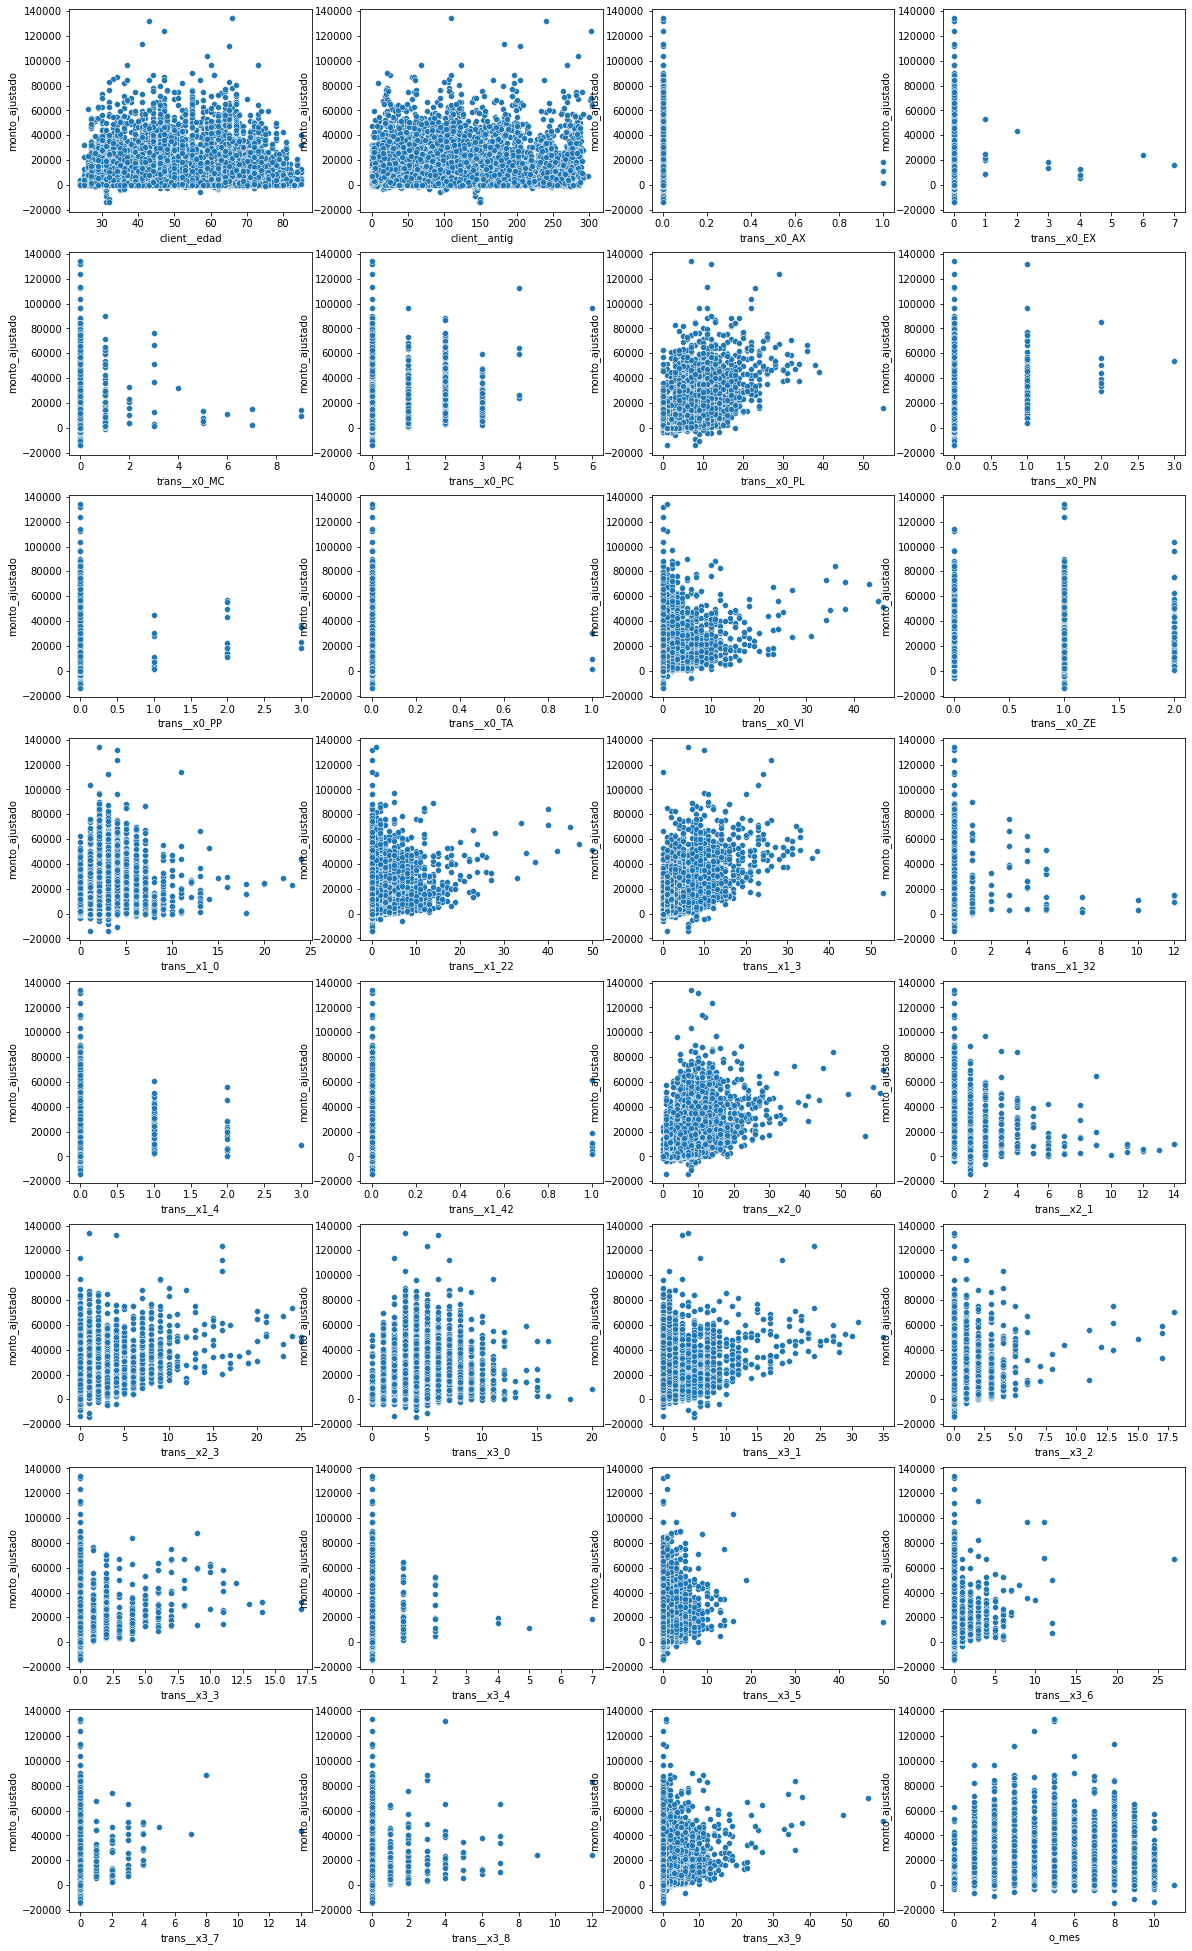

In [4]:
# Visualizamos solo las numericas y las transaccionales sumarizadas
cols = [x for x in df.columns.values if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')
cols.remove('monto_ajustado')

# plot
n_cols = 4
n_rows = math.ceil(len(cols)/n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 35))
count = 0
for i in cols:    
    row = math.floor(count / n_cols)
    col = count % n_cols
    ax = axs[row, col]
    sns.scatterplot(data=df, x=i, y='monto_ajustado', ax=ax)
    count =count +1

plt.show()

### Distribuciones de monto_ajustado con respecto a otras variables numericas discretas

En el orden en que se ven en el grafico anterior, comenzando por el primero arriba a la izquierda

#### Datos del cliente
- *client__edad* (edad del cliente): La distribucion se asemeja a una uniforme, con un rango de montos mayoritariamente entre 0 y 50000. Hay una pendiente ascendente pronunciada entre 0 y 30 años y una descendente y menos pronunciada entre 65 y 100 aproximadamente. Esto nos indica que hay un rango etario mas chico a edades mas tempranas donde los gastos crecen, y un rango mas grande a edades mas tardias donde los gastos decrecen.
- *client__antig* (Antiguedad del cliente): Similar a edad, la distribucion se asemeja a una uniforme con un rango de montos mayoritariamente entre 0 y 50000. Este rango de montos se mantiene constante para casi todas las antiguedades presentes, excepto un rango entre 200 y 250 aproximadamente donde se puede observar una leve baja en el rango de montos. Es interesante de estudiar, ya que no habria una razon inmediata para pensar que ese particular rango de antiguedades deberia gastar menos que los otros. No deberiamos descartar tambien la posibilidad de que haya cierto sesgo.

#### Datos de la transacción
Para cada variable, el eje horizontal representa la cantidad de transacciones en esa categoria, para un solo mes. 
##### Producto Naranja
- *trans__x0_AX* (American Express): La mayoria de los clientes se concentran en 0 ya que es un producto muy poco usado. 
- *trans__x0_EX* (Extraccion cajeros Nac.): Mismo caso que AX, con algunos casos con mas frecuencia de uso en un solo mes. 
- *trans__x0_MC* (Master Card): Mismo caso que EX
- *trans_x0_PC* (Plan de Cuotas): Si bien muchos casos estan en 0, existe una mayor distribucion para 1, 2, y 3. Al tratarse de un plan de cuotas seria esperable que muchos clientes usen este producto en varios meses. 
- *trans_x0_PL* (Plan Largo): Es uno de los productos mas usados en el dataset. Se extiende mayoritariamente entre 0 y 30 usos mensuales. Entre 0 y 20 usos la distribucion parece ser uniforme, con un rango de gastos entre 0 y 60000. Puede verse una cierta tendencia a aumentar los gastos a medida que aumenta PL.
- *trans__x0_PN* (Prestamos Personales PN): La mayoria de los casos estan en 0, disminuyendo en cantidad para mayor PN.
- *trans__x0_PP* (Plan de Pago Propuesto): Similar a PN
- *trans__x0_TA* (Transfer Naranja Arg): Similar a PP
- *trans__x0_VI* (Visa): Similar a PL, reune un gran numero de transacciones del dataset, sin embargo no se distribuyen parecido. El mayor rango de montos se concentra cerca de 0 para VI, y a medida que este ultimo aumenta, el rango se acorta y queda aprox entre 0 y 40000 para un valor de ~12 para VI. Se podria decir que los montos tienden a disminuir para mayor cantidad de gastos en este producto. 
- *trans__x0_ZE* (Zeta Optada): Hay una cantidad similar de casos para 0 y 1, disminuyendo para 2.

##### Tipo Producto Naranja
- *trans__x1_American_express*: La mayoria de los dnis no tiene gastos con este tipo de producto
- *trans__x1_Clasica*: El rango de montos va entre 0 y 80000 aprox, con una pendiente corta pero abrupta entre 0 y ~3 y descendiendo a partir de ese valor, acortando el rango de montos. 
- *trans__x1_Master_Internacional*: Se puede ver una distribucion con un contorno parecido al caso de 'Clasica' pero con mayoria de casos concentrados en 0.
- *trans__x1_Naranja*: Es de los tipos de producto mas usados, con una distribucion parecida al producto PL. Esto nos dice que probablemente se comportan parecido y son parte de las mismas transacciones en muchos casos. 
- *trans__x1_Naranja_virtual*: Mayoria de casos en 0, disminuyendo para 1 y 2. 
- *trans__x1_Visa_internacional*: Se distribuye de manera parecida al producto VI. Similar al caso del tipo 'Naranja' y PL, podriamos estar viendo las mismas transacciones. 

##### Tipo de moneda
- *trans__x2_Dolares*: Las transacciones en dolares tienen su rango mas grande para las cantidades bajas de transacciones, y luego disminuye tanto en rango como en valor a medida que aumentan. 
- *trans__x3_Pesos*: Se puede ver una distribucion medianamente uniforme para un rango entre 0 y 60000 pesos, de 0 a 20 transacciones mensuales. Para valores mas grandes habria mayor dispersion tanto en montos como en cantidad de transacciones. Se distribuye de una manera similar a PL, esto se explica por la cantidad de gastos hechos en pesos y en producto PL, que son la mayoria. 
- *trans__x2_Zeta*: Si bien hay menos transacciones que en pesos, se puede observar como el rango de monto disminuye en tamaño pero estabilizandose en valores altos, mayores a 20000, para mas de 10 transacciones en moneda Zeta. 
- *trans__x3_0 (Comercios 0)*: Se distribuye similar a tipo producto 'Clasica' pero con una forma levemente mas alargada. Tiene una pendiente inicial, un pico, y luego un descenso de los gastos mas paulatino. El rango de los montos siempre con un piso en 0, cubriendo toda el area debajo del contorno de manera uniforme. 
- *trans__x3_1 (Comercios 1)*: Se distribuye similar a tipo producto 'Visa internacional', pero con una forma de 'piramide acostada' mas definida. El rango comienza entre 0 y ~90000 y disminuye con tendencia a estabilizarse cerca de 50000 para mayor cantidad de gastos en estos comercios. La distribucion de puntos es mas densa para valores entre 0 y ~13 en el eje horizontal.
- *trans__x3_2 (Comercios 2)*: Si bien hay menor cantidad de casos y la mayoria se concentran en 0, se puede decir que tiene una forma similar al caso de comercios 1.
- *trans__x3_3 (Comercios 3)*: Similar a Comercios 2 con una menor concentracion sobre el lado izquierdo del grafico. 
- *trans__x3_4 (Comercios 4)*: La mayoria de los casos se concentran en 0
- *trans__x3_5 (Comercios 5)*: Similar a otras distribuciones ya vistas, hay un rango grande de montos para casos cercanos a 0, y se forma una especie de 'piramide acostada', cercana a estabilizar el rango centrandose cerca de 20000 para mas frecuencia de gastos en este comercio.
- *trans__x3_6 (Comercios 6)*: Similar a Comercio 5, sin embargo la mayoria de los casos se concentran en numeros bajos de cantidad de gastos mensuales.
- *trans__x3_7 (Comercios 7)*: Similar a Comercio 6, con alta concentración en 0. 
- *trans__x3_8 (Comercios 8)*: Igual que el caso anterior, solo que con mayor distribucion para el rango entre 2 y 8 casos mensuales, pero concentrando la mayoria en 0. 
- *trans__x3_9 (Comercios 9)*: Junto con Comercio 5 y Comercio 1, parece concentrar la mayoria de casos. La distribucion tambien es, como en otros casos, similar a una piramide acostada, con la punta estabilizando valores de montos un poco por debajo de 20000, para un rango entre 0 y 20 casos mensuales. 
##### Nº de mes
- *o_mes*: de 0 a 10 representa los meses Julio-2020 - Junio-2021. Se distribuye de una manera cercana a la uniforme, pero descendiendo para los meses en las puntas, y aumentando para los meses en el medio. Si tenemos en cuenta que las puntas son invierno y entre los meses 4 y 6 es verano, esta distribucion se explica ya que la gente tiende a gastar mas a fin de año.


### Balanceo de DataFrame

Para el balanceo de datos, aseguramos que cada cliente tenga al menos una transacción dentro de cada mes, colocando monto cero en meses donde no haya consumos.

In [5]:
df['dni_titular_movimiento'].nunique() * df['anio_mes_cupon'].nunique() # dnis x cantidad de meses

9852

In [6]:
print('Cantidad de Meses por Titular (Final):',df['dni_titular_movimiento'].nunique() * df['anio_mes_cupon'].nunique())
print('Shape Dataframe:', df.shape)

Cantidad de Meses por Titular (Final): 9852
Shape Dataframe: (7410, 56)


Corroboramos aquellos titulares que no tienen movimientos en todos los meses

In [7]:
df[['dni_titular_movimiento','anio_mes_cupon']].drop_duplicates().groupby(['dni_titular_movimiento']).size().reset_index(name='counts').sort_values(by='counts')

,dni_titular_movimiento,counts
354,0006b827182be3790f4983851eae6a72301,1
27,000071f1f7541835440a7b95e8280add842,1
703,000ce0a075eb02ff2decefb5d5d477b6069,1
487,00092d5c893e1a689d88d96ab217ae12832,1
744,000d825001c54cde70e79c2c0c2ca144103,1
...,...,...
371,00070a4981542ed6aaca3e1187ba82a0293,11
675,000c871be99df761652d9c7e531e05cb027,11
177,0002ec99c87c40ea558370277c2af620206,11
522,0009d755757673758d8a50f3e0a7d346850,11


In [8]:
array_mes = df.anio_mes_cupon.sort_values().unique()
array_dni = df.dni_titular_movimiento.unique()

dic = {'dni': [], 'mes': []}
for dni in array_dni:
    for mes in array_mes:
        dic['dni'].append(dni)
        dic['mes'].append(mes)

df_mes_imp = pd.merge(pd.DataFrame(dic), 
                      df, 
                      left_on=['dni','mes'], 
                      right_on=['dni_titular_movimiento','anio_mes_cupon'], 
                      how='left') \
                .drop(columns=['dni_titular_movimiento','anio_mes_cupon'])
df_mes_imp = df_mes_imp.rename(columns={'dni': 'dni_titular_movimiento','mes': 'anio_mes_cupon'})
df_mes_imp

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado,o_mes
0,0001ad171f1562c43ff9d73795e851be920,202007.0,40.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4521.11,0.0
1,0001ad171f1562c43ff9d73795e851be920,202008.0,40.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3361.68,1.0
2,0001ad171f1562c43ff9d73795e851be920,202009.0,40.0,43.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4432.64,2.0
3,0001ad171f1562c43ff9d73795e851be920,202010.0,40.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,8452.73,3.0
4,0001ad171f1562c43ff9d73795e851be920,202011.0,40.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12923.95,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,00073e893b40d39e8be8bf7e74c51737985,202102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9848,00073e893b40d39e8be8bf7e74c51737985,202103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9849,00073e893b40d39e8be8bf7e74c51737985,202104.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1363.44,9.0
9850,00073e893b40d39e8be8bf7e74c51737985,202105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Imputamos 0 en las columnas de la transacción que tienen nan
cols = df_mes_imp.columns.values
cols_zero = [x for x in cols if 'trans' in x]
cols_zero.append('monto_ajustado')
df_mes_imp[cols_zero] = df_mes_imp[cols_zero].fillna(0)

# Imputamos lo valores propios del cliente
cols_client = [x for x in cols if ('client_' in x) & ('antig' not in x) & ('edad' not in x)]
cols_client_imp = cols_client.copy()
cols_client_imp.append('dni_titular_movimiento')

data_mes = df_mes_imp[cols_client_imp].dropna().drop_duplicates().reset_index().drop(columns='index')
df_imputer = df_mes_imp.drop(columns=cols_client).copy()

# Imputamos los datos del cliente y ordenamos
df_mes_imp = df_imputer.merge(data_mes, on='dni_titular_movimiento')[cols].sort_values(by=['dni_titular_movimiento', 'anio_mes_cupon']).reset_index().drop(columns=['index'])

# Imputamos antigüedad
for dni in array_dni:
    min_mes = df_mes_imp[(df_mes_imp['dni_titular_movimiento'] == dni) & (~df_mes_imp.client__antig.isna())]['anio_mes_cupon'].min()
    min_ant = df_mes_imp[(df_mes_imp['dni_titular_movimiento'] == dni) & (~df_mes_imp.client__antig.isna())]['client__antig'].min()
    for mes in array_mes:
        num_res = array_mes.tolist().index(mes) - array_mes.tolist().index(min_mes)
        antig_cli = min_ant + num_res
        if antig_cli < 0:
            df_mes_imp.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['anio_mes_cupon'] == mes)), 'client__antig'] = 0
        else:
            df_mes_imp.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['anio_mes_cupon'] == mes)), 'client__antig'] = antig_cli

In [10]:
# Imputación Edad
df_mes_imp_eb = df_mes_imp[['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad']].copy()
for dni in array_dni:
    edad = df_mes_imp_eb[df_mes_imp['dni_titular_movimiento'] == dni]['client__edad'].fillna(method='backfill')
    df_mes_imp_eb.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['client__edad'].isna())), 'client__edad'] = edad
df_mes_imp_eb = df_mes_imp_eb.rename(columns={'client__edad': 'edad_b'})

df_mes_imp_ef = df_mes_imp[['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad']].copy()
for dni in array_dni:
    edad = df_mes_imp_ef[df_mes_imp['dni_titular_movimiento'] == dni]['client__edad'].fillna(method='ffill')
    df_mes_imp_ef.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['client__edad'].isna())), 'client__edad'] = edad
df_mes_imp_ef = df_mes_imp_ef.rename(columns={'client__edad': 'edad_f'})

df_mes_imp = df_mes_imp.merge(df_mes_imp_eb,
                             left_on=['dni_titular_movimiento', 'anio_mes_cupon'],
                             right_on=['dni_titular_movimiento', 'anio_mes_cupon']
                            )
df_mes_imp = df_mes_imp.merge(df_mes_imp_ef,
                             left_on=['dni_titular_movimiento', 'anio_mes_cupon'],
                             right_on=['dni_titular_movimiento', 'anio_mes_cupon']
                            )
df_mes_imp.loc[df_mes_imp['client__edad'].isna(), 'client__edad'] = df_mes_imp['edad_b']
df_mes_imp.loc[df_mes_imp['client__edad'].isna(), 'client__edad'] = df_mes_imp['edad_f']

df_mes_imp.drop(columns=['edad_b','edad_f'], inplace=True)

In [11]:
df_mes = df_mes_imp.copy()

In [12]:
ordinal_ft = 'dni_titular_movimiento'
target = 'monto_ajustado'

In [13]:
df_mes['o_mes'] = df_mes.anio_mes_cupon.astype('category').cat.codes

# Modelos de Regresión - Predicción de consumo

In [15]:
# Features and target
X = df.drop([ordinal_ft, target, 'anio_mes_cupon'], axis=1)
y = df[target]

In [16]:
len(X.columns)

53

In [17]:
num_features = [g for g in X.columns if 'client__x' not in g]
cat_features = [g for g in X.columns if 'client__x' in g]

In [18]:
len(X.columns) - len(num_features + cat_features)

0

Matriz de resultados

In [19]:
results = pd.DataFrame(index=['MSE Train', 'MSE Valid', 'RMSE Train', 'RMSE Valid', 'MAE Train', 'MAE Valid'])

## Linear SVR - Default

LinerSVR es un modelo lineal. Teniendo en cuenta las visualizaciones al principio del practico donde observamos que las features númericas no se relacionan de forma lineal con el objetivo, no podríamos esperar mucho de este modelo o cualquier modelo lineal dado el caso.

Elegimos MinMaxScaler para escalar las features númericas, para conservar el signo de las transacciones en negativo.

Usamos _SelectFromModel()_ para reducir el numero de features del dataset, y de esa manera intentar mejorar las predicciones con un costo de computo menor al que si usaramos todas las features. Para seleccionar las columnas usamos _RandomForestRegressor_

In [20]:
# Preproceso 1 para SGDRegressor - Default, RMSE 3395.724
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = LinearSVR(random_state=0)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=0, shuffle=False)

Elegimos una relacion entre train y validación de un 35% para validación. Esto lo hicimos en base a que en pruebas anteriores tuvimos casos donde el MSE para el conjunto de validacion era menor que en de train. Investigando sobre esto, dimos con que este problema se denomina under-fitting. Al tratarse de un modelo lineal tratando de predecir datos no lineales, este problema es esperable. Modificamos la cantidad de datos en train y validación para prevenir la sobre simplificacion del modelo sobre los datos e intentar reducir este problema. 

#### Linear SVR - Preproceso y ajuste

In [22]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [23]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
svr = model

In [24]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Linear SVR -  Evaluación de predicciones

In [25]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 321353086, Valid error 252003365


In [26]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 17926, Valid error RMSE 15875


In [27]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 10799, Valid error MAE 9836


Cargamos matriz de resultados

In [28]:
results['LinearSVR'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [29]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2594.00
mean,11119.73
std,13846.11
min,-14160.00
25%,705.25
50%,6152.50
75%,16570.75
max,113759.00


In [30]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2594.00
mean,3235.21
std,303.83
min,2541.82
25%,3003.12
50%,3209.87
75%,3438.96
max,4372.55


## Linear SVR - Grid Search

In [38]:
param_grid = {
    'regressor__epsilon': [0.1, 0.01, 0.0001,0.001],
    'regressor__tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'regressor__C': [1, 2, 0.01, 0.001],
    'regressor__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

# Preproceso 1 para SGDRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = LinearSVR(random_state=0)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### Linear SVR(GSCV) Preproceso y ajuste

In [39]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)

model.fit(X_train, y_train)
svr_cv = model

In [40]:
model.best_params_

{'regressor__tol': 1e-06,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__epsilon': 0.0001,
 'regressor__C': 1}

In [41]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Linear SVR(GSCV) - Evaluacion de predicciones

In [42]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 77540462, Valid error 92669473


In [43]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8805, Valid error RMSE 9626


In [44]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 5049, Valid error MAE 5342


Cargamos matriz de resultados

In [45]:
results['LinearSVR - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [46]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [47]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8770.34
std,10409.83
min,-2715.78
25%,1228.38
50%,4809.77
75%,13378.46
max,82143.48


### LinearSVR - Conclusiones 

Si bien no es esperable que un modelo lineal de buenos resultados, se puede usar como base para comparar con el resto de modelos.

---

## SGDRegressor - Default

SGDRegressor usa modelos lineales y optimiza con descenso por gradiente. Podríamos considerarlo como una generalización de los modelos lineales.

Elegimos MinMaxScaler para escalar las features númericas, para conservar el signo de las transacciones en negativo.

Usamos _SelectFromModel()_ para reducir el numero de features del dataset, y de esa manera intentar mejorar las predicciones con un costo de computo menor al que si usaramos todas las features. Para seleccionar las columnas usamos _LinearSVR_

In [47]:
# Preproceso 1 para SGDRegressor - Default, RMSE 3395.724
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = SGDRegressor(random_state=0, shuffle=False)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### SGD - Preproceso y ajuste

In [48]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
sgd = model

In [49]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### SGD - Evaluacion de predicciones

In [50]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 129191303, Valid error 104952540


In [51]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 11366, Valid error RMSE 10245


In [52]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 7346, Valid error MAE 7104


Cargamos matriz de resultados

In [53]:
results['SGD'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [54]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2223.00
mean,10963.67
std,13383.32
min,-14160.00
25%,815.50
50%,6304.00
75%,16108.50
max,113759.00


In [55]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2223.00
mean,11548.91
std,9246.27
min,-1483.54
25%,4975.07
50%,9321.83
75%,15600.26
max,89445.84


## SGDRegressor- Grid Search

In [20]:
param_grid = {
    'regressor__loss': ['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],
    'regressor__penalty': ['l2','l1'],
    'regressor__alpha': [0.01, 0.1, 1],
    'regressor__epsilon': [0.1, 0.01],
    'regressor__tol': [1e-3, 1e-4],
    'regressor__learning_rate': ['optimal', 'adaptive', 'invscaling', 'constant']
    #'max_iter': [1000, 2000, 5000]
}

# Preproceso 1 para SGDRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = SGDRegressor(random_state=0, shuffle=False)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### SGD(GSCV) - Preproceso y ajuste

In [21]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [22]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=20)

model.fit(X_train, y_train)
sgd_cv = model

In [23]:
model.best_params_

{'regressor__tol': 0.001,
 'regressor__penalty': 'l1',
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__learning_rate': 'adaptive',
 'regressor__epsilon': 0.01,
 'regressor__alpha': 0.01}

In [24]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### SGD(GSCV) Evaluacion de predicciones

In [25]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 77702634, Valid error 92795587


In [26]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8814, Valid error RMSE 9633


In [27]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 5017, Valid error MAE 5322


Cargamos matriz de resultados

In [28]:
results['SGD - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [66]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2223.00
mean,10963.67
std,13383.32
min,-14160.00
25%,815.50
50%,6304.00
75%,16108.50
max,113759.00


In [67]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2223.00
mean,12116.89
std,10032.84
min,-1049.32
25%,4434.23
50%,10124.97
75%,16369.48
max,97208.26


### SGDRegressor - Conclusiones 

Este modelo, tampoco dió buenos resultados. Creemos que por las mismas razones que explicamos en el LinerSVR, que al ser modelos lineales, los resultados no son óptimos.

---

## KNeighborsRegressor - Default

In [69]:
# Preproceso 1 para SGDRegressor - GridSearch, RMSE 3778.109
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = KNeighborsRegressor()

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

X_train.shape, X_val.shape

((5187, 53), (2223, 53))

#### KNN - Preproceso y ajuste

In [70]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
knn = model

In [71]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### KNN - Evaluacion de predicciones

In [72]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 100763970, Valid error 147029423


In [73]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 10038, Valid error RMSE 12126


In [74]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 6440, Valid error MAE 8436


Cargamos matriz de resultados

In [75]:
results['KNN'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [76]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2223.00
mean,10963.67
std,13383.32
min,-14160.00
25%,815.50
50%,6304.00
75%,16108.50
max,113759.00


In [77]:
pd.DataFrame(y_valid_pred.astype(int), columns=['val_pred']).describe().round(2)

,val_pred
count,2223.00
mean,11698.26
std,10098.17
min,-1327.00
25%,4108.00
50%,9274.00
75%,16799.00
max,68961.00


## KNeighborsRegressor - Grid Search

In [78]:
# Preproceso 1 para KNeighborsRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = KNeighborsRegressor()

param_grid = {
    'regressor__n_neighbors': [3,4,5,6],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['auto','ball_tree','kd_tree','brute'],
    'regressor__p': [1,2]
}

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### KNN(GSCV) - Preproceso y ajuste

In [79]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [80]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
 # ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

model.fit(X_train, y_train)
knn_cv = model

In [81]:
model.best_params_

{'regressor__algorithm': 'auto',
 'regressor__n_neighbors': 6,
 'regressor__p': 1,
 'regressor__weights': 'distance'}

In [82]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### KNN(GSCV) - Evaluacion de predicciones

In [83]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 0, Valid error 104103681


In [84]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 0, Valid error RMSE 10203


In [85]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 0, Valid error MAE 6415


Cargamos matriz de resultados

In [86]:
results['KNN - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [87]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2223.00
mean,10963.67
std,13383.32
min,-14160.00
25%,815.50
50%,6304.00
75%,16108.50
max,113759.00


In [88]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2223.00
mean,10035.30
std,10449.81
min,-1918.11
25%,1936.52
50%,7270.03
75%,14443.14
max,66683.44


### KNN - Conclusiones 

Este modelo presentó overffiting tanto en su versión por default como añadiendo la busqueda de hiperparámetros por GridSearchCV. Esto nos indica que este no es un buen modelo que se ajuste a nuestro set de datos.

---

## GaussianProcessRegressor - Default

In [62]:
# Preproceso 1 para GaussianProcessRegressor - Default
df = df_mes.copy()
scaler = StandardScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = GaussianProcessRegressor(random_state=0) # Kernel?

# Features and target
X = df.drop([ordinal_ft, target], axis=1)
y = df[target]

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### GPR - Preproceso y ajuste

In [65]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
gpr = model

# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### GPR - Evaluacion de predicciones

In [66]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 0, Valid error 239825060


In [67]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 0, Valid error RMSE 15486


In [68]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 0, Valid error MAE 8006


Cargamos matriz de resultados

In [69]:
results['GPR'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [70]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [71]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,2422.20
std,4712.32
min,-36499.00
25%,0.01
50%,515.85
75%,3693.93
max,50222.50


## GaussianProcessRegressor - Grid Search 

In [119]:
ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq, ker_expsine]

param_grid = {"regressor__kernel": kernel_list,
              "regressor__alpha": [0.1]}

In [120]:
# Preproceso 1 para GaussianProcessRegressor - GridSearch
df = df_mes.copy()
scaler = StandardScaler()
#ft_selector = RandomForestRegressor(random_state=0)
model_ = GaussianProcessRegressor(random_state=0) # Kernel?

In [121]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### GPR(GSCV) - Preproceso y ajuste

In [122]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [123]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, verbose=2)

model.fit(X_train, y_train)
gpr_cv = model

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   7.0s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   6.7s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   6.4s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   6.0s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   6.2s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 3.4min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 3.4min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 3.4min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale

In [124]:
model.best_params_

{'regressor__alpha': 0.1,
 'regressor__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1)}

In [125]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### GPR(GSCV) - Evaluacion de predicciones

In [126]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 821351, Valid error 93462569


In [127]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 906, Valid error RMSE 9668


In [128]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 490, Valid error MAE 5284


Cargamos matriz de resultados

In [129]:
results['GPR - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [130]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [131]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8891.08
std,9535.82
min,-320.69
25%,775.76
50%,5702.75
75%,14757.29
max,38663.13


### GaussianProcessRegressor - Conclusiones 

Este modelo no fue funcional a nuestros datos, ya que la distribución de los mismos, no se corresponde con un grupo de Gaussianas.

---

## XGBRegressor - Default

In [133]:
# Preproceso 1 para XGBRegressor - Default
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = XGBRegressor(random_state=0, verbosity=1)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

#### XGB - Preproceso y ajuste

In [136]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
xgb = model

# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### XGB - Evaluacion de predicciones

In [137]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 18314347, Valid error 92441015


In [138]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 4279, Valid error RMSE 9615


In [139]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 2342, Valid error MAE 4970


Cargamos matriz de resultados

In [140]:
results['XGB'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [141]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,9076.82
std,14443.45
min,-10944.00
25%,0.00
50%,2635.50
75%,12734.50
max,134045.00


In [142]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8754.52
std,10908.42
min,-6066.99
25%,136.11
50%,5363.22
75%,13843.10
max,78768.10


## XGBRegressor - Grid Search

In [29]:
# Preproceso 1 para KNeighborsRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
model_ = XGBRegressor(random_state=0)#, booster='gbtree')

La combinacion de hiperparametros es mas densa en este modelo porque fue el que mejor resultados dio en cuanto a RMSE

In [30]:
param_grid = {'regressor__n_estimators': [90,100,110],
              'regressor__max_depth': [0, 5, 10],
              'regressor__eta': [0.15, 0.1, 0.08],
              'regressor__subsample': [0.6,0.4],
              'regressor__colsample_bytree': [0.3, 0.5],
              'regressor__booster' : ['gbtree', 'dart']}

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### XGB(GSCV) - Preproceso y ajuste

In [31]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, verbose=1)

model.fit(X_train, y_train)
xgb_cv = model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [32]:
model.best_params_

{'regressor__booster': 'dart',
 'regressor__colsample_bytree': 0.3,
 'regressor__eta': 0.08,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 90,
 'regressor__subsample': 0.4}

In [33]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### XGB(GSCV) - Evaluacion de predicciones

In [34]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 51265239, Valid error 90217927


In [35]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 7159, Valid error RMSE 9498


In [36]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 4016, Valid error MAE 5102


Cargamos matriz de resultados

In [37]:
results['XGB - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [154]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [155]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8842.05
std,10556.15
min,-682.30
25%,79.45
50%,5522.62
75%,14288.11
max,58420.04


### XGBRegressor - Conclusiones 

Este modelo presentó los mejores resultados. Esto puede deberse a que es un algorítmo basado en árboles de decisión y optimizado por un peso que se le otorga en los errores. Como nuestros datos no tienen una distribución conocida, este modelo logró captar mejor el comportamiento.

---

## VotingRegressor

Este modelo se basa en otros modelos para predecir los resultados. En este caso vamos a usar aquellos que tienen menor error, ya que realizando algunas pruebas con todos los modelos instanciados anteriormente,  no se obtenian mejores resultados. 

A continuación, visualizamos la tabla de resultados de errores hasta el momento.

In [156]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV
MSE Train,325331854,113904255,128674107,114076637,86980638,9,265,821351,18314347,46464133
MSE Valid,264308481,91651314,104776825,92266135,119910815,99696987,45522333100,93462569,92441015,90732706
RMSE Train,18036,10672,11343,10680,9326,3,16,906,4279,6816
RMSE Valid,16258,9573,10236,9606,10950,9985,213360,9668,9615,9525
MAE Train,10862,6736,7395,6842,5721,0,1,490,2342,3771
MAE Valid,10022,6321,6948,6437,7241,6382,52790,5284,4970,5033


In [50]:
# Entrenamos con SVR, SGD y XGB

df = df_mes.copy()
scaler = MinMaxScaler()
model_ = VotingRegressor([('svr_cv', svr_cv.best_estimator_['regressor']),
                          ('sgd_cv', sgd_cv.best_estimator_['regressor']),
                          ('xgb_cv', xgb_cv.best_estimator_['regressor'])], verbose=True)

In [51]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [52]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [53]:
# Fit
model_voting = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model_voting.fit(X_train, y_train)

[Voting] ................... (1 of 3) Processing svr_cv, total=   0.2s
[Voting] ................... (2 of 3) Processing sgd_cv, total=   0.3s
[Voting] ................... (3 of 3) Processing xgb_cv, total=   1.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['client__edad',
                                                   'client__antig',
                                                   'trans__x0_AX',
                                                   'trans__x0_EX',
                                                   'trans__x0_MC',
                                                   'trans__x0_PC',
                                                   'trans__x0_PL',
                                                   'trans__x0_PN',
                                                   'trans__x0_PP',
                                                   'trans__x0_TA',
                                                   'trans__x0_VI',
                                                   'trans__x0_ZE',
                                                   'trans__x1_0',
                       

In [54]:
# Predict
y_train_pred = model_voting.predict(X_train)
y_valid_pred = model_voting.predict(X_val)

#### Evaluacion de predicciones

In [55]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 65697623, Valid error 89575177


In [56]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8105, Valid error RMSE 9464


In [57]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 4609, Valid error MAE 5172


Cargamos matriz de resultados

In [173]:
results['Voting'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [174]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [175]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8573.81
std,10362.69
min,-1840.83
25%,659.52
50%,4722.20
75%,13361.66
max,74262.74


## Resultados para modelos de regresión

In [176]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV,Voting
MSE Train,325331854,113904255,128674107,114076637,86980638,9,265,821351,18314347,46464133,63658118
MSE Valid,264308481,91651314,104776825,92266135,119910815,99696987,45522333100,93462569,92441015,90732706,89659010
RMSE Train,18036,10672,11343,10680,9326,3,16,906,4279,6816,7978
RMSE Valid,16258,9573,10236,9606,10950,9985,213360,9668,9615,9525,9469
MAE Train,10862,6736,7395,6842,5721,0,1,490,2342,3771,4469
MAE Valid,10022,6321,6948,6437,7241,6382,52790,5284,4970,5033,5068


Voting dio el mejor resultado. Esto es de esperar ya que se uso el mejor modelo (XGB) junto con otros para reducir aun mas el error. De igual manera, la reduccion del error no es significativa.

## Evaluacion en conjunto de test

Evaluamos voting, el mejor modelo de regresión, en el conjunto de test

In [109]:
df_test = pd.read_parquet('df_supervisado_agrupado_test.parquet')

In [110]:
df['o_mes'] = df.anio_mes_cupon.astype('category').cat.codes

In [111]:
df.columns

Index(['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad',
       'client__antig', 'client__x0_Hombre', 'client__x0_Mujer',
       'client__x0_Sin Datos', 'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio', 'client__x1_Sector_Financiero',
       'client__x1_Sector_No_Operativo', 'client__x1_Sector_Operativo',
       'client__x1_Sector_Salud', 'client__x1_Sector_Seguridad',
       'client__x1_Sector_Sin_Datos', 'client__x2_Casado', 'client__x2_Otros',
       'client__x2_Sin_datos', 'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC',
       'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacio

In [112]:
[x for x in df_test.columns if x not in df.columns]

['client__x1_Sector_Judicial', 'client__x1_Sector_Personal_Jerarquico']

In [95]:
df_test[[x for x in df.columns if x not in df_test.columns]] = 0

In [96]:
# Features and target
X_test = df_test.drop([ordinal_ft, target, 'anio_mes_cupon'], axis=1)
y_test = df_test[target]

In [97]:
num_features = [g for g in X_test.columns if 'client__x' not in g]
cat_features = [g for g in X_test.columns if 'client__x' in g]

In [98]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [99]:
X_test_s = preprocessor.fit_transform(X_test)

In [100]:
X_test_s

array([[0.1122449 , 0.17201835, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.13302752, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.13302752, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25510204, 0.62614679, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57142857, 0.27981651, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07142857, 0.11238532, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [101]:
# Predict
y_test_pred = model_.predict(X_test_s)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 53 is different from 61)

# Modelos de Clasificacion - Predecir aumento de gasto mensual

## Preprocesamiento

### 1.2 Creación de variable categórica 

Creamos una columna que indica si un cliente ha aumentado su consumo personal mes a mes. El mes inicial para cada cliente se inicializa en 0.

Cabe destacar que a la hora de agrupar los movimientos en cada mes, se considera la fecha de cierre de la tarjeta, por lo cual cada mes comprende desde el dia 25 del mes anterior hasta el dia 24 del corriente, inclusive. 

In [120]:
df_mes

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado,o_mes
0,000000b5aea2c9ea7cc155f6ebcef97f826,202007.0,46.0,224.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72,1
2,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61,2
3,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46,3
4,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68,7
9848,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08,8
9849,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64,9
9850,000f0b73ebfa002a79a0642b82e87919904,202105.0,64.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2063.81,10


In [121]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_mes['fg_aumentado'] = 0
for i in range(1,len(df_mes)):
    if (df_mes.iloc[i]['dni_titular_movimiento'] == df_mes.iloc[i-1]['dni_titular_movimiento']) \
        & (df_mes.iloc[i]['anio_mes_cupon'] > df_mes.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_mes.iloc[i]['monto_ajustado'] - df_mes.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_mes.iloc[i-1]['monto_ajustado'])*0.1)):
                df_mes.loc[i,'fg_aumentado'] = 1

In [122]:
target_c = 'fg_aumentado'
ordinal_ft = 'dni_titular_movimiento'

In [123]:
# Features and target
X = df_mes.drop([ordinal_ft, target_c, 'anio_mes_cupon'], axis=1)
y = df_mes[target_c]

In [124]:
num_features = [g for g in X.columns if 'client__x' not in g]
cat_features = [g for g in X.columns if 'client__x' in g]

In [125]:
len(X.columns) - len(num_features + cat_features)

0

## RandomForestClassifier - Default

In [184]:
# Preproceso 1 para SGDRegressor - Default
scaler = MinMaxScaler()
ft_selector = RandomForestClassifier(random_state=0)
model_ = RandomForestClassifier(random_state= 0, max_depth=20, min_samples_split=20)

In [185]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [186]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [187]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model.fit(X_train, y_train)
rfc = model

In [188]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [189]:
# Evaluate train
text = "RandomForestClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4764
           1       0.88      0.81      0.84      2132

    accuracy                           0.91      6896
   macro avg       0.90      0.88      0.89      6896
weighted avg       0.90      0.91      0.90      6896



In [190]:
# Evaluate val
text = "RandomForestClassifier - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val, y_valid_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2015
           1       0.69      0.64      0.67       941

    accuracy                           0.79      2956
   macro avg       0.76      0.75      0.76      2956
weighted avg       0.79      0.79      0.79      2956



Text(0.5, 1.0, 'Random Forest - CM Train\n')

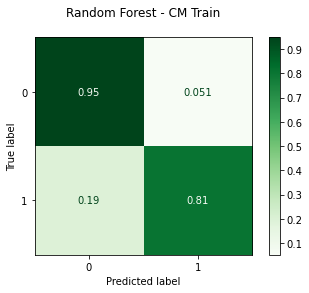

In [191]:
plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Random Forest - CM Train\n')

Text(0.5, 1.0, 'Random Forest - CM Valid\n')

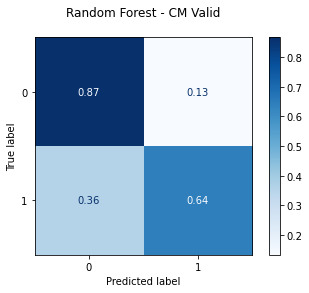

In [192]:
plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest - CM Valid\n')

## RandomForestClassifier - Grid Search

In [193]:
# Preproceso 1 para SGDRegressor - Default
scaler = MinMaxScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = RandomForestClassifier(random_state= 0)

In [194]:
param_grid = {'cla__n_estimators' : [75, 100],
                'cla__criterion':['gini', 'entropy'],
                'cla__max_depth': [20, 25],
                'cla__min_samples_split': [20, 25],
                'cla__min_samples_leaf':[5, 6, 8],
                'cla__max_features':[0.5, 0.7, 0.8]}

In [195]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [196]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [197]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='f1', cv=5, verbose=1)

model.fit(X_train, y_train)
rfc_cv = model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [198]:
model.best_params_

{'cla__n_estimators': 100,
 'cla__min_samples_split': 20,
 'cla__min_samples_leaf': 8,
 'cla__max_features': 0.7,
 'cla__max_depth': 20,
 'cla__criterion': 'gini'}

In [199]:
# Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [200]:
# Evaluate train
text = "RandomForestClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4764
           1       0.86      0.77      0.81      2132

    accuracy                           0.89      6896
   macro avg       0.88      0.86      0.87      6896
weighted avg       0.89      0.89      0.89      6896



In [201]:
# Evaluate val
text = "RandomForestClassifier - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val, y_valid_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2015
           1       0.69      0.64      0.67       941

    accuracy                           0.79      2956
   macro avg       0.76      0.75      0.76      2956
weighted avg       0.79      0.79      0.79      2956



Text(0.5, 1.0, 'Random Forest (GSCV) - CM Train\n')

<Figure size 432x288 with 0 Axes>

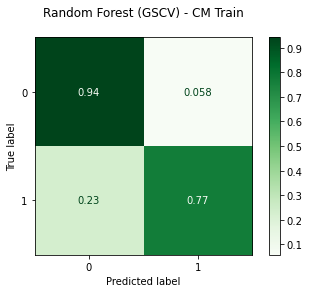

In [203]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Random Forest (GSCV) - CM Train\n')

Text(0.5, 1.0, 'Random Forest (GSCV) - CM Valid\n')

<Figure size 432x288 with 0 Axes>

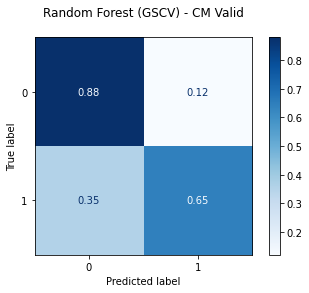

In [204]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest (GSCV) - CM Valid\n')

## XGBoost - Default

In [205]:
# Preproceso 1 para XGBClassifier - Default
scaler = MaxAbsScaler()
ft_selector = LinearSVR(random_state=0)
model_ = XGBClassifier(random_state= 0)

In [206]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [207]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [208]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model.fit(X_train, y_train)
xgbc = model

[21:15:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [209]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [210]:
# Evaluate train
text = "XGBoost - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred))

XGBoost - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4764
           1       0.86      0.73      0.79      2132

    accuracy                           0.88      6896
   macro avg       0.87      0.84      0.85      6896
weighted avg       0.88      0.88      0.88      6896



In [211]:
# Evaluate val
text = "XGBoost - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val, y_valid_pred))

XGBoost - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2015
           1       0.62      0.51      0.56       941

    accuracy                           0.75      2956
   macro avg       0.71      0.68      0.69      2956
weighted avg       0.74      0.75      0.74      2956



Text(0.5, 1.0, 'XGBoost - CM Train\n')

<Figure size 432x288 with 0 Axes>

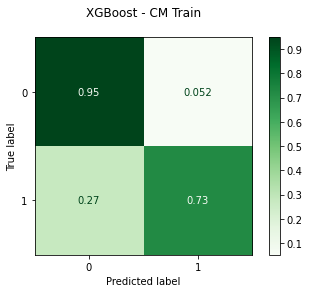

In [212]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('XGBoost - CM Train\n')

Text(0.5, 1.0, 'XGBoost - CM Valid\n')

<Figure size 432x288 with 0 Axes>

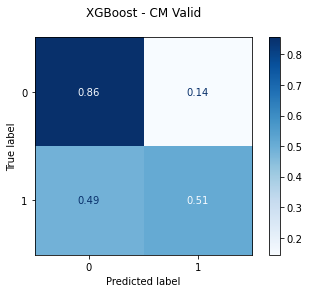

In [213]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('XGBoost - CM Valid\n')

## XGBoost - Grid Search

In [214]:
# Preproceso 1 para SGDRegressor - Default
scaler = MaxAbsScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = XGBClassifier(random_state= 0, use_label_encoder=False)

In [215]:
param_grid = {
    'cla__alpha' : [0.01, 0.42, 0.30],
    'cla__max_depth': [8, 16, 32],
    'cla__n_estimators': [5, 10, 15],
    'cla__booster':['gbtree', 'dart'],
    'cla__eval_metric': ['mlogloss']
}

In [216]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [217]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [218]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, verbose=1)

model.fit(X_train, y_train)
xgbc_cv = model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [219]:
model.best_params_

{'cla__alpha': 0.42,
 'cla__booster': 'gbtree',
 'cla__eval_metric': 'mlogloss',
 'cla__max_depth': 8,
 'cla__n_estimators': 15}

In [220]:
# Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [221]:
# Evaluate train
text = "XGBoost (GSCV) - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train, y_train_pred))

XGBoost (GSCV) - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4764
           1       0.81      0.75      0.78      2132

    accuracy                           0.87      6896
   macro avg       0.85      0.83      0.84      6896
weighted avg       0.87      0.87      0.87      6896



In [222]:
# Evaluate val
text = "XGBoost (GSCV) - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val, y_valid_pred))

XGBoost (GSCV) - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2015
           1       0.62      0.51      0.56       941

    accuracy                           0.75      2956
   macro avg       0.71      0.68      0.69      2956
weighted avg       0.74      0.75      0.74      2956



Text(0.5, 1.0, 'XGBoost (GSCV) - CM Train\n')

<Figure size 432x288 with 0 Axes>

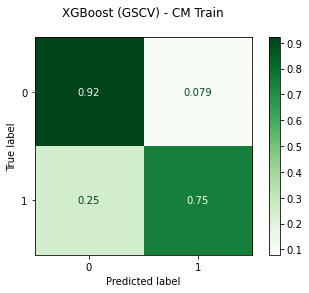

In [223]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('XGBoost (GSCV) - CM Train\n')

Text(0.5, 1.0, 'XGBoost (GSCV) - CM Valid\n')

<Figure size 432x288 with 0 Axes>

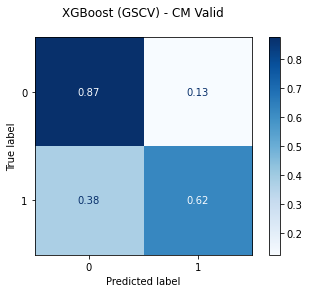

In [224]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('XGBoost (GSCV) - CM Valid\n')

FIN
----
----